In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## First feeling on data

In [2]:
# Read in data 
df = pd.read_excel("20210420_Ergebnis.XLSX")

In [3]:
# Visualizing shape of data set
df.shape

(240410, 4)

In [4]:
# Plot first observations of data
df.head()

,Lnd,Datum Beginn,Datum Ende,Wirtschaftssektor
0,FR,2019-07-02,2019-07-04 00:00:00,21.0
1,AT,2019-06-12,2019-06-12 00:00:00,21.0
2,IT,2019-06-16,2019-06-20 00:00:00,21.0
3,PL,2019-07-08,2019-07-11 00:00:00,21.0
4,BE,2019-06-26,2019-06-27 00:00:00,21.0


In [5]:
'''Checking for the 107 missing values'''
df["Lnd"].isna().sum() # Indeed, 107 observations with missing destinations.

'''Checking for other columns'''
df["Wirtschaftssektor"].isna().sum() # 183 observations with missing Wirtschaftssektor. 
df["Datum Beginn"].isna().sum() # 0 observations with missing Datum Beginn.
df["Datum Ende"].isna().sum() # 29 observations with missing Datum Ende.

'''Filling missing values with string: "missing"'''
df["Lnd"].fillna("Missing", inplace=True) # (Corrected missing)
df["Wirtschaftssektor"].fillna("Missing", inplace=True) # (Corrected missing)
df["Datum Ende"].fillna("Missing", inplace=True) # (Corrected missing)

#### Checking how many categories does "Wirtschaftssektor" has, for later encoding.

In [6]:
df["Wirtschaftssektor"].value_counts() # Apparently: there is the category 0.0 which is not cover on literature encoding.
df["Wirtschaftssektor"].value_counts().sum() # Number of observations categorized matched.

240410

## Result:

Yvonne, there is a sector category identified as "0.0" which is not cover in the report. Bug? 

# Task 1: Total amount by destination

In [7]:
amount_by_destination = df["Lnd"].value_counts()
# amount_by_destination.shape # 33 categories
# amount_by_destination.sum() # All observations included
df_task1 = amount_by_destination.to_frame()
df_task1 = df_task1.rename_axis('Destination', axis=0)
df_task1 = df_task1.rename(columns={'Lnd': 'Total amount'})
df_task1 = df_task1.reset_index()
df_task1.to_excel('newData/TotalAmountByDestination.xlsx')

In [8]:
# Global settings for visualizations
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["xtick.labelsize"] = 12

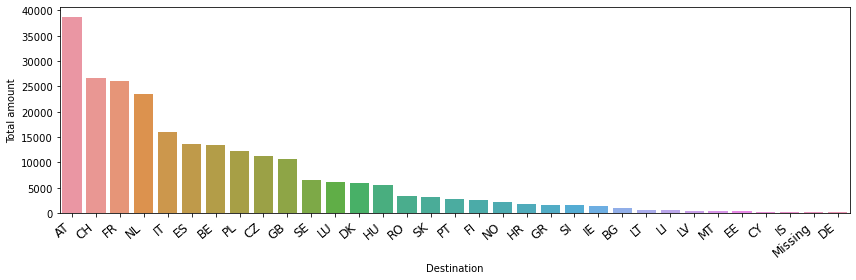

In [9]:
plt.figure(figsize=(12,4)) 

ax = sns.barplot(df_task1['Destination'],df_task1['Total amount'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [10]:
fig1 = ax.get_figure()
fig1.savefig('seabornVisuals/visual_TotalAmountByDestination.png')

In [11]:
# Trasnformig to .bmp and then manuyally converting to excel.
from PIL import Image

file_in = "seabornVisuals/visual_TotalAmountByDestination.png"
img = Image.open(file_in)
file_out = 'seabornVisuals/visual_TotalAmountByDestination.bmp'
if len(img.split()) == 4:
    # prevent IOError: cannot write mode RGBA as BMP
    r, g, b, a = img.split()
    img = Image.merge("RGB", (r, g, b))
    img.save(file_out)
else:
    print('Error')
    img.save(file_out)

In [12]:
# Disctionary with enconding variables for sector
dict = {"Economic Sector":  {1: "Land- und Forstwirtschaft, Fischerei", 
                                 2: "Bergbau und Gewinnung von Steinen und Erden", 3: "Verarbeitendes Gewerbe", 4: "Energieversorgung",
                                 5: "Wasserversorgung, Abwasser- und Abfallentsorgung, Beseitigung von Umweltverschmutzungen", 6: "Baugewerbe", 7: "Groß- und Einzelhandel",
                                 8: "Verkehr (außer Güterbeförderung im Straßenverkehr) und Lagerei", 9: "Verkehr (Güterbeförderung im Straßenverkehr)", 10: "Gastgewerbe / Beherbergung und Gastronomie",
                                 11: "Information und Kommunikation", 12: "Erbringung von Finanz- und Versicherungsdienstleistungen", 13: "Grundstücks- und Wohnungswesen",
                                 14: "Erbringung von freiberuflichen, wissenschaftlichen oder technischen Dienstleistungen", 15: "Erbringung von sonstigen wirtschaftlichen Dienstleistungen (außer Vermittlung und Überlassung von Arbeitskräften)", 16: "Vermittlung und Überlassung von Arbeitskräften",
                                 17: "Öffentliche Verwaltung, Verteidigung, Sozialversicherung", 18: "Erziehung und Unterricht", 19: "Gesundheits- und Sozialwesen",
                                 20: "Kunst, Unterhaltung und Erholung", 21: "Erbringung von sonstigen Dienstleistungen", 22: "Private Haushalte",
                                }}

# Task 2: Total amount by Sector

In [13]:
amount_by_sector = df["Wirtschaftssektor"].value_counts()
# amount_by_sector.shape # 24 categories
# amount_by_sector.sum() # All observations included
df_task2 = amount_by_sector.to_frame()
df_task2 = df_task2.rename_axis('Economic Sector', axis=0)
df_task2 = df_task2.rename(columns={'Wirtschaftssektor': 'Total amount'})
df_task2 = df_task2.reset_index()
df_task2 = df_task2.replace(dict)
#df_task2
df_task2.to_excel('newData/TotalAmountBySector.xlsx')

# Task 3: Total amount by duration
## Task 3.1: Defining duration

In [14]:
df_duration = pd.read_csv("20210420_Ergebnis.csv") # Not necessary, could continue to work with .xlsx but does not make difference, I thought there was a bug in reading in data using read_csv.
df_duration.dtypes

Lnd                   object
Datum Beginn          object
Datum Ende            object
Wirtschaftssektor    float64
dtype: object

In [15]:
'''
Some observations were written/filled with non-sense numbers:6019-01-28. The workaround is to not consider them
'''
df_duration['Datum Beginn'] = pd.to_datetime(df_duration['Datum Beginn'], errors = 'coerce')
df_duration['Datum Ende'] = pd.to_datetime(df_duration['Datum Ende'], errors = 'coerce')
df_duration.dtypes


Lnd                          object
Datum Beginn         datetime64[ns]
Datum Ende           datetime64[ns]
Wirtschaftssektor           float64
dtype: object

In [16]:
df_duration['Duration'] = df_duration['Datum Ende'] - df_duration['Datum Beginn']
df_duration['Duration'].fillna("Missing", inplace=True)
df_duration.to_excel('OriginalDataPlusDuration.xlsx')

## Task 3.2: Total amount by duration

In [17]:
amount_by_duration = df_duration['Duration'].value_counts()
# amount_by_duration.shape # 608 categories
# amount_by_duration.sum() # 240378 observation -> 32 nonsense overwritten (Corrected)
df_task3 = amount_by_duration.to_frame()
df_task3 = df_task3.rename_axis('Duration (days)', axis=0)
df_task3 = df_task3.rename(columns={'Duration': 'Total amount'})
df_task3 = df_task3.reset_index()
df_task3.to_excel('newData/TotalAmountByDuration.xlsx')
df_task3

,Duration (days),Total amount
0,1 days 00:00:00,45001
1,2 days 00:00:00,41410
2,0 days 00:00:00,32488
3,4 days 00:00:00,27098
4,3 days 00:00:00,26390
...,...,...
603,421 days 00:00:00,1
604,693 days 00:00:00,1
605,32874 days 00:00:00,1
606,497 days 00:00:00,1


# Task 4: Duration by sector

In [18]:
df_task4 = df_duration[['Wirtschaftssektor', 'Duration']]
df_task4['Wirtschaftssektor'].fillna("-1", inplace=True)
#df_task4['Wirtschaftssektor'].isna().sum()
df_task4['Duration'] = df_task4['Duration'].astype('str').str.replace(' days 00:00:00', '')
#df_task4

/Users/lvicen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-18-95aa6046053e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4['Duration'] = df_task4['Duration'].astype('str').str.replace(' days 00:00:00', '')


In [19]:
df_task4['Wirtschaftssektor'] = df_task4['Wirtschaftssektor'].apply(pd.to_numeric)
df_task4['Duration'] = pd.to_numeric(df_task4.Duration, errors='coerce')
#df_task4.dtypes
#df_task4

<ipython-input-19-a586b0daf14f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4['Wirtschaftssektor'] = df_task4['Wirtschaftssektor'].apply(pd.to_numeric)
<ipython-input-19-a586b0daf14f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4['Duration'] = pd.to_numeric(df_task4.Duration, errors='coerce')


In [20]:
# Groupby one column and return the mean of the remaining columns in each group.
gpr = df_task4.groupby('Wirtschaftssektor')
mean_grp_sector = gpr.mean()
mean_grp_sector = mean_grp_sector.reset_index()
#mean_grp_sector

# Checking results: Groupby one column and return the mean of the remaining columns in each group.
    # duration_by_sectors = df_task4.groupby('Wirtschaftssektor').mean()
    # duration_by_sectors

In [21]:
# Disctionary with enconding variables for sector
encode = {"Wirtschaftssektor":  {-1.0: "Missing", 
                                 1.0: "Land- und Forstwirtschaft, Fischerei", 
                                 2.0: "Bergbau und Gewinnung von Steinen und Erden", 3.0: "Verarbeitendes Gewerbe", 4.0: "Energieversorgung",
                                 5.0: "Wasserversorgung, Abwasser- und Abfallentsorgung, Beseitigung von Umweltverschmutzungen", 6.0: "Baugewerbe", 7.0: "Groß- und Einzelhandel",
                                 8.0: "Verkehr (außer Güterbeförderung im Straßenverkehr) und Lagerei", 9.0: "Verkehr (Güterbeförderung im Straßenverkehr)", 10.0: "Gastgewerbe / Beherbergung und Gastronomie",
                                 11.0: "Information und Kommunikation", 12.0: "Erbringung von Finanz- und Versicherungsdienstleistungen", 13.0: "Grundstücks- und Wohnungswesen",
                                 14.0: "Erbringung von freiberuflichen, wissenschaftlichen oder technischen Dienstleistungen", 15.0: "Erbringung von sonstigen wirtschaftlichen Dienstleistungen (außer Vermittlung und Überlassung von Arbeitskräften)", 16.0: "Vermittlung und Überlassung von Arbeitskräften",
                                 17.0: "Öffentliche Verwaltung, Verteidigung, Sozialversicherung", 18.0: "Erziehung und Unterricht", 19.0: "Gesundheits- und Sozialwesen",
                                 20.0: "Kunst, Unterhaltung und Erholung", 21.0: "Erbringung von sonstigen Dienstleistungen", 22.0: "Private Haushalte",
                                }}
mean_grp_sector = mean_grp_sector.replace(encode)
mean_grp_sector = mean_grp_sector.rename(columns={'Wirtschaftssektor': 'Economic Sector', 'Duration': 'Average Duration (days)'})
mean_grp_sector.to_excel('newData/DurationBySector.xlsx')
mean_grp_sector

,Economic Sector,Average Duration (days)
0,Missing,145.781421
1,0,28.795816
2,"Land- und Forstwirtschaft, Fischerei",36.034106
3,Bergbau und Gewinnung von Steinen und Erden,16.988347
4,Verarbeitendes Gewerbe,14.630341
5,Energieversorgung,28.885906
6,"Wasserversorgung, Abwasser- und Abfallentsorgu...",36.126422
7,Baugewerbe,52.416839
8,Groß- und Einzelhandel,29.065938
9,Verkehr (außer Güterbeförderung im Straßenverk...,31.757851


# Task 5: Duration by destination 

In [22]:
df_task5 = df_duration[['Lnd', 'Duration']]
df_task5["Lnd"].fillna("Missing", inplace=True)

/Users/lvicen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
df_task5['Duration'] = df_task5['Duration'].astype('str').str.replace(' days 00:00:00', '')
df_task5['Duration'] = pd.to_numeric(df_task5.Duration, errors='coerce')
duration_by_destination = df_task5.groupby('Lnd').mean()
#df_task5.dtypes
duration_by_destination.to_excel('newData/DurationByDestination.xlsx')

<ipython-input-23-4dc40f2a1303>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task5['Duration'] = df_task5['Duration'].astype('str').str.replace(' days 00:00:00', '')
<ipython-input-23-4dc40f2a1303>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task5['Duration'] = pd.to_numeric(df_task5.Duration, errors='coerce')


# Task 6: Over time (monthly) total numbers

In [24]:
columns = ['Wirtschaftssektor', 'Duration', 'Lnd']
df_task6 = df_duration.drop(columns, axis = 1)
df_task6['Count'] = 1
#df_task6
#df_duration.dtypes

In [25]:
# Filtering time frame
start, end = '2019-10-01 00:00:00', '2021-03-31 00:00:00'
after_start = df_task6['Datum Beginn'] >= start
before_end = df_task6['Datum Beginn'] <= end
between_two_dates = after_start & before_end
filtered_frame = df_task6.loc[between_two_dates]
filtered_frame

,Datum Beginn,Datum Ende,Count
11,2019-10-04,2019-10-05,1
23,2019-10-08,2019-10-11,1
24,2019-10-07,2019-10-10,1
35,2019-10-06,2019-10-09,1
52,2019-10-17,2019-10-25,1
...,...,...,...
240403,2019-11-28,2019-11-29,1
240404,2019-11-19,2019-11-22,1
240406,2019-11-25,2019-11-27,1
240407,2019-12-15,2019-12-16,1


In [26]:
grp_date = filtered_frame.set_index('Datum Beginn')
#grp_date

In [27]:
monthly_and_days = grp_date.groupby([pd.Grouper(freq="1M"), "Datum Beginn"]).sum()
#monthly_request.head(31)

In [28]:
monthly_only = grp_date.groupby([pd.Grouper(freq="1M")]).sum()
monthly_only = monthly_only.rename_axis('Month')
monthly_only.to_excel('newData/TotalNumbersOverTime.xlsx')
#monthly_only.head(50)

# Task 07: Sector hit the hardest

In [29]:
columns = ['Duration', 'Lnd']
df_task7 = df_duration.drop(columns, axis = 1)
start, end = '2019-10-01 00:00:00', '2021-03-31 00:00:00'
after_start = df_task7['Datum Beginn'] >= start
before_end = df_task7['Datum Beginn'] <= end
between_two_dates = after_start & before_end
filtered_frame7 = df_task7.loc[between_two_dates]
#filtered_frame7.dtypes
#filtered_frame7

In [30]:
filtered_frame7 = filtered_frame7.rename(columns={'Wirtschaftssektor': 'Economic Sector'})
filtered_frame7['Economic Sector'].value_counts().sum()

135053

In [31]:
filtered_frame7['Economic Sector'] = filtered_frame7['Economic Sector'].fillna(-1.0)
#filtered_frame7['Wirtschaftssektor'].isna().sum()
#filtered_frame7['Wirtschaftssektor'].value_counts().sum()

In [32]:
filtered_frame7 = filtered_frame7.replace(encode)
filtered_frame7

,Datum Beginn,Datum Ende,Economic Sector
11,2019-10-04,2019-10-05,21.0
23,2019-10-08,2019-10-11,21.0
24,2019-10-07,2019-10-10,21.0
35,2019-10-06,2019-10-09,21.0
52,2019-10-17,2019-10-25,21.0
...,...,...,...
240403,2019-11-28,2019-11-29,21.0
240404,2019-11-19,2019-11-22,21.0
240406,2019-11-25,2019-11-27,21.0
240407,2019-12-15,2019-12-16,21.0


In [33]:
grp_date7 = filtered_frame7.set_index('Datum Beginn')
grp_date7

,Datum Ende,Economic Sector
Datum Beginn,,
2019-10-04,2019-10-05,21.0
2019-10-08,2019-10-11,21.0
2019-10-07,2019-10-10,21.0
2019-10-06,2019-10-09,21.0
2019-10-17,2019-10-25,21.0
...,...,...
2019-11-28,2019-11-29,21.0
2019-11-19,2019-11-22,21.0
2019-11-25,2019-11-27,21.0


In [34]:
date_sectorly = grp_date7.groupby([pd.Grouper(freq="1M"), 'Economic Sector']).count()
date_sectorly.head(50)

Datum Ende
Datum Beginn Economic Sector            
2019-10-31   -1.0                      1
              0.0                     45
              1.0                     41
              2.0                     77
              3.0                   5763
              4.0                    191
              5.0                     41
              6.0                    436
              7.0                   1417
              8.0                    347
              9.0                    225
              10.0                    77
              11.0                   747
              12.0                   374
              13.0                    14
              14.0                   958
              15.0                  1090
              16.0                   103
              17.0                   731
              18.0                   189
              19.0                   396
              20.0                   359
              21.0                  2065
              22.0                     4
2019-11-30    0.0                      9
              1.0                     49
              2.0                     55
              3.0                   6299
              4.0                    182
              5.0                     49
              6.0                    444
              7.0                   1306
              8.0                    252
              9.0                    224
              10.0                    86
              11.0                   845
              12.0                   348
              13.0                    24
              14.0                   984
              15.0                  1318
              16.0                   102
              17.0                   673
              18.0                   128
              19.0                   336
              20.0                   371
              21.0                  1982
              22.0                     4
2019-12-31    0.0                      1
              1.0                     27
              2.0                     34

In [35]:
date_sectorly = date_sectorly.rename(columns={'Datum Ende': 'Total Number'})
date_sectorly

Total Number
Datum Beginn Economic Sector              
2019-10-31   -1.0                        1
              0.0                       45
              1.0                       41
              2.0                       77
              3.0                     5763
...                                    ...
2021-03-31    17.0                       5
              18.0                      10
              19.0                      14
              20.0                      49
              21.0                     522

[400 rows x 1 columns]

In [36]:
date_sectorly.to_excel('newData/SectorOverTimeTotalNumbers.xlsx')

# Task 8: Sector 14 over time

In [37]:
df_task8 = df_duration
df_task8 = df_task8.rename(columns={'Lnd': 'Destination', 'Datum Beginn': 'Starting date', 'Datum Ende': 'Ending date', 'Wirtschaftssektor': 'Economic Sector'})
df_task8.dtypes

Destination                object
Starting date      datetime64[ns]
Ending date        datetime64[ns]
Economic Sector           float64
Duration                   object
dtype: object

In [38]:
df_task8 = df_task8.drop(df_task8[df_task8['Economic Sector'] != 14.0].index)
df_task8

,Destination,Starting date,Ending date,Economic Sector,Duration
15320,AT,2019-06-12,2019-06-12,14.0,0 days 00:00:00
15321,AT,2019-06-19,2019-06-19,14.0,0 days 00:00:00
15322,FR,2019-06-14,2019-06-17,14.0,3 days 00:00:00
15323,FR,2019-08-28,2019-08-29,14.0,1 days 00:00:00
15633,AT,2019-05-05,2019-05-06,14.0,1 days 00:00:00
...,...,...,...,...,...
214935,HU,2021-03-22,2021-03-26,14.0,4 days 00:00:00
222925,PL,2021-03-23,2021-03-24,14.0,1 days 00:00:00
229808,AT,2021-03-22,2021-03-26,14.0,4 days 00:00:00
236635,BE,2021-03-22,2021-03-26,14.0,4 days 00:00:00


In [39]:
grp8 = df_task8.set_index('Starting date')
special = {"Economic Sector":  {14.0: "Erbringung von freiberuflichen, wissenschaftlichen oder technischen Dienstleistungen"}} 
grp8 = grp8.replace(special)
grp8['Duration'] = grp8['Duration'].astype('str').str.replace(' days 00:00:00', '')
grp8['Duration'] = grp8['Duration'].astype('int')
grp8.dtypes
#grp8

Destination                object
Ending date        datetime64[ns]
Economic Sector            object
Duration                    int64
dtype: object

In [40]:
# Creating a colum with values of 1. This number stands for request exist. So the sum of of request equals the total number.
grp8['Total Number'] = 1

In [41]:
monthly_and_destination_sector14 = grp8.groupby([pd.Grouper(freq="1M"), 'Destination']).sum()
monthly_and_destination_sector14.to_excel('newData/Sector14DestinationSpecificOverTime.xlsx')
#monthly_and_destination_sector14.head(50)

In [42]:
monthly_sector14 = grp8.groupby([pd.Grouper(freq="1M")]).sum()
monthly_sector14.to_excel('newData/Sector14OverTime.xlsx')
#monthly_sector14.head(50)

# Task 9 & 10: Sector 10 Total Over Time

In [43]:
df_task9 = df_duration
df_task9 = df_task9.rename(columns={'Lnd': 'Destination', 'Datum Beginn': 'Starting date', 'Datum Ende': 'Ending date', 'Wirtschaftssektor': 'Economic Sector'})
df_task9 = df_task9.drop(df_task9[df_task9['Economic Sector'] != 10.0].index)
df_task9

,Destination,Starting date,Ending date,Economic Sector,Duration
36158,GR,2019-05-01,2019-10-31,10.0,183 days 00:00:00
36166,ES,2019-09-04,2019-09-06,10.0,2 days 00:00:00
36196,ES,2019-06-24,2019-06-26,10.0,2 days 00:00:00
36251,BE,2019-03-11,2019-03-15,10.0,4 days 00:00:00
36263,CZ,2019-07-02,2019-07-10,10.0,8 days 00:00:00
...,...,...,...,...,...
203102,AT,2019-09-07,2019-09-07,10.0,0 days 00:00:00
203106,BE,2019-06-15,2019-06-16,10.0,1 days 00:00:00
203107,BE,2019-06-29,2019-06-30,10.0,1 days 00:00:00
203128,AT,2019-06-10,2019-06-16,10.0,6 days 00:00:00


In [44]:
grp9 = df_task9.set_index('Starting date')
special = {"Economic Sector":  {10.0: "Gastgewerbe / Beherbergung und Gastronomie"}} 
grp9 = grp9.replace(special)
grp9['Duration'] = grp9['Duration'].astype('str').str.replace(' days 00:00:00', '')
grp9['Duration'] = grp9['Duration'].astype('int')
grp9['Total Number'] = 1
#grp9.dtypes
#grp9

In [45]:
monthly_and_destination_sector10 = grp9.groupby([pd.Grouper(freq="1M"), 'Destination']).sum()
monthly_and_destination_sector10 = monthly_and_destination_sector10.drop(['Duration'], axis = 1)
monthly_and_destination_sector10.to_excel('newData/Sector10DestinationSpecificOverTime.xlsx')
#monthly_and_destination_sector10.head(50)

In [46]:
monthly_sector10 = grp9.groupby([pd.Grouper(freq="1M")]).sum()
monthly_sector10  = monthly_sector10.drop(['Duration'], axis = 1)
monthly_sector10.to_excel('newData/Sector10OverTime.xlsx')
#monthly_sector10.head(50)